<a href="https://colab.research.google.com/github/emman-data/Boston-Housing-Price-Prediction/blob/master/ANZ_Virtual_Internship_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANZ VIRTUAL EXPERIENCE PROGRAM**
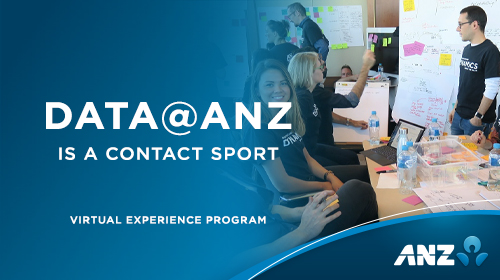

**Background** 

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

# **Task 1:**

Load the transaction dataset below into an analysis tool of your choice (Excel, R, SAS, Tableau, or similar)

Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?

Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

For a challenge – what insights can you draw from the location information provided in the dataset?






# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
%matplotlib inline
sns.set_style('whitegrid')

# **Read the Data**

In [ ]:
transact = pd.read_excel('ANZ synthesised transaction dataset.xlsx',sheet_name='DSynth_Output_100c_3m_v3')

# **Understanding the Data**

In [ ]:
transact.head(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit


In [ ]:
transact.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [ ]:
transact.shape

(12043, 23)

In [ ]:
transact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [ ]:
transact.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
card_present_flag,7717.0,0.802644,0.398029,0.00,1.000,1.00,1.000,1.00
merchant_code,883.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.00
balance,12043.0,14704.195553,31503.722652,0.24,3158.585,6432.01,12465.945,267128.52
age,12043.0,30.582330,10.046343,18.00,22.000,28.00,38.000,78.00
amount,12043.0,187.933588,592.599934,0.10,16.000,29.00,53.655,8835.98


# **Exploratory Data Analysis**

**Confirm the one-to-one link of the account and the customer_id**

In [ ]:
transact['account'].nunique(),transact['customer_id'].nunique()

(100, 100)

In [ ]:
transact['transaction_id'].nunique()

12043

**Change the format of the extraction and date columns to datetime**

In [ ]:
transact['extraction'] = pd.to_datetime(transact['extraction'])
transact['date'] = pd.to_datetime(transact['date'])

In [ ]:
DateRange = (transact.date.max()-transact.date.min()).days
DateRange

91

**Derive the weekday and hour of each transaction**

In [ ]:
transact['weekday'] = transact['extraction'].dt.dayofweek
transact['hour'] = transact['extraction'].dt.hour
transact['month'] = transact['extraction'].apply(lambda time: time.month)
transact['day_name'] = transact['extraction'].dt.day_name()

In [ ]:
transact['month'] = transact.month.replace({8:'Aug',9:'Sept',10:'Oct'})

**Split the customer and merchant geo-locations into individual columns for analysis**

In [ ]:
transact['merchant_long_lat']

0        153.38 -27.99
1        151.21 -33.87
2        151.21 -33.87
3        153.05 -26.68
4        153.44 -28.06
             ...      
12038    145.23 -37.81
12039    150.88 -33.96
12040    150.92 -33.74
12041    145.09 -37.91
12042    151.19 -33.93
Name: merchant_long_lat, Length: 12043, dtype: object

In [ ]:
transact['long_lat'] = transact['merchant_long_lat'].astype(str)
transact[['cust_long','cust_lat']] = transact.long_lat.str.split(' ',expand=True)
transact[['cust_long','cust_lat']] = transact[['cust_long','cust_lat']].astype(float)

In [ ]:
transact['merchant_long_lat'] = transact['merchant_long_lat'].astype(str)
transact[['merchant_longitude','merchant_latitude']] = transact.merchant_long_lat.str.split(' ',expand=True)
transact[['merchant_longitude','merchant_latitude']] = transact[['merchant_longitude','merchant_latitude']].astype(float)

In [ ]:
transact[['cust_long','cust_lat']].head()

,cust_long,cust_lat
0,153.38,-27.99
1,151.21,-33.87
2,151.21,-33.87
3,153.05,-26.68
4,153.44,-28.06


**Check the range of the customer location and filter out transactions for those who do not reside in Australia**

In [ ]:
import requests
url = 'http://www.ga.gov.au/scientific-topics/national-location-information/dimensions/continental-extremities'
html = requests.get(url).content
df_list = pd.read_html(html)
extremeties = df_list[-1]
extremeties

,EXTREMITY,FEATURE,LATITUDE,LONGITUDE
0,North,"Cape York (Cape York Peninsula, Queensland)","10° 41' 21"" S","142° 31' 50"" E"
1,East,"Cape Byron (Byron Bay, New South Wales)","28° 38' 15"" S","153° 38' 14"" E"
2,South (Mainland),"South Point (Wilsons Promontory, Victoria)","39°; 08' 20"" S","146° 22' 26"" E"
3,South,South East Cape (Tasmania),"43° 38' 40"" S","146° 49' 30"" E"
4,West,"Steep Point (Shark Bay, Western Australia)","26° 09' 5"" S","113° 09' 18"" E"


In [ ]:
cust_check = transact[(transact['cust_lat']>-44) & (transact['cust_lat']<-10) & (transact['cust_long']>113) & (transact['cust_long']<154)]
cust_check['customer_id'].nunique()

100

**Check the distribution of missing values**

In [ ]:
transact.isnull().sum()

status                    0
card_present_flag      4326
bpay_biller_code      11158
account                   0
currency                  0
long_lat                  0
txn_description           0
merchant_id            4326
merchant_code         11160
first_name                0
balance                   0
date                      0
gender                    0
age                       0
merchant_suburb        4326
merchant_state         4326
extraction                0
amount                    0
transaction_id            0
country                   0
customer_id               0
merchant_long_lat         0
movement                  0
weekday                   0
hour                      0
month                     0
day_name                  0
cust_long              4326
cust_lat               4326
merchant_longitude     4326
merchant_latitude      4326
dtype: int64

In [ ]:
100*transact.isnull().sum()/transact.shape[0]

status                 0.000000
card_present_flag     35.921282
bpay_biller_code      92.651333
account                0.000000
currency               0.000000
long_lat               0.000000
txn_description        0.000000
merchant_id           35.921282
merchant_code         92.667940
first_name             0.000000
balance                0.000000
date                   0.000000
gender                 0.000000
age                    0.000000
merchant_suburb       35.921282
merchant_state        35.921282
extraction             0.000000
amount                 0.000000
transaction_id         0.000000
country                0.000000
customer_id            0.000000
merchant_long_lat      0.000000
movement               0.000000
weekday                0.000000
hour                   0.000000
month                  0.000000
day_name               0.000000
cust_long             35.921282
cust_lat              35.921282
merchant_longitude    35.921282
merchant_latitude     35.921282
dtype: f

In [ ]:
import missingno as msno

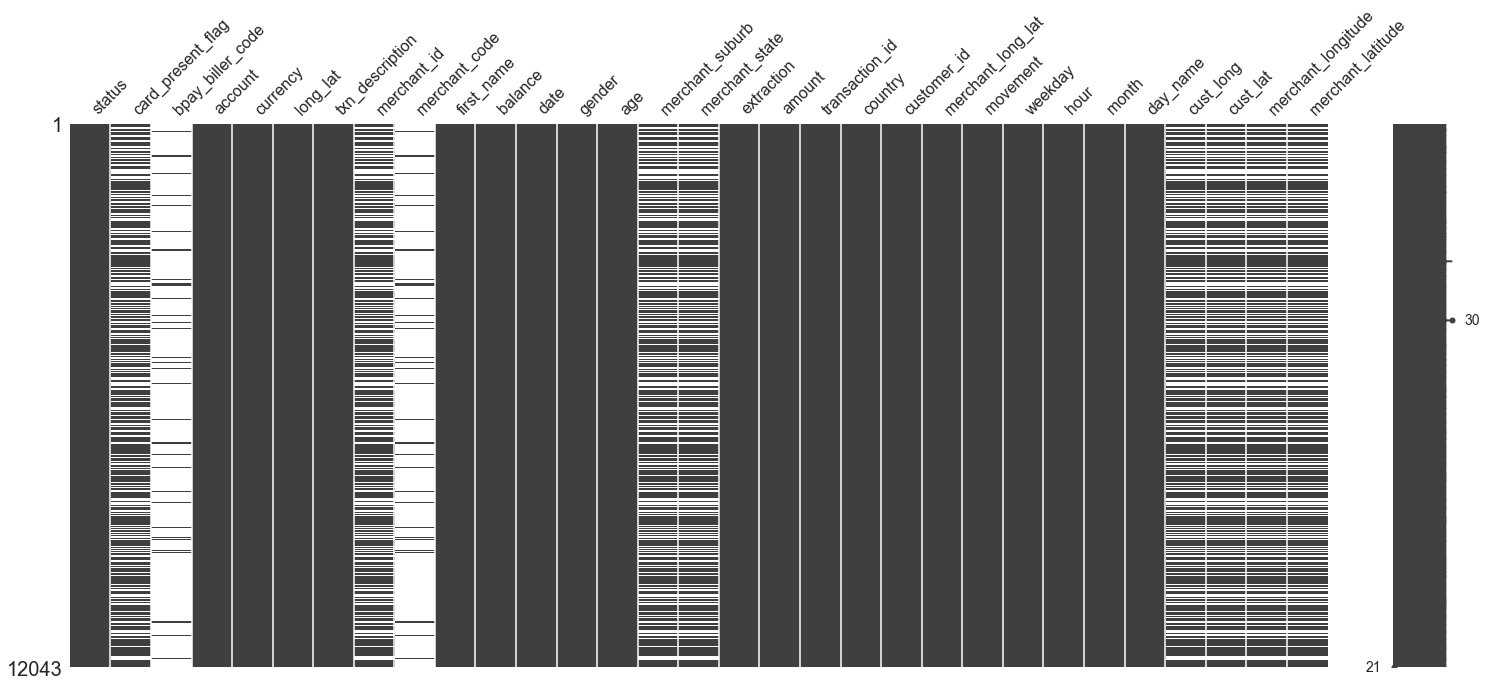

In [ ]:
msno.matrix(transact)

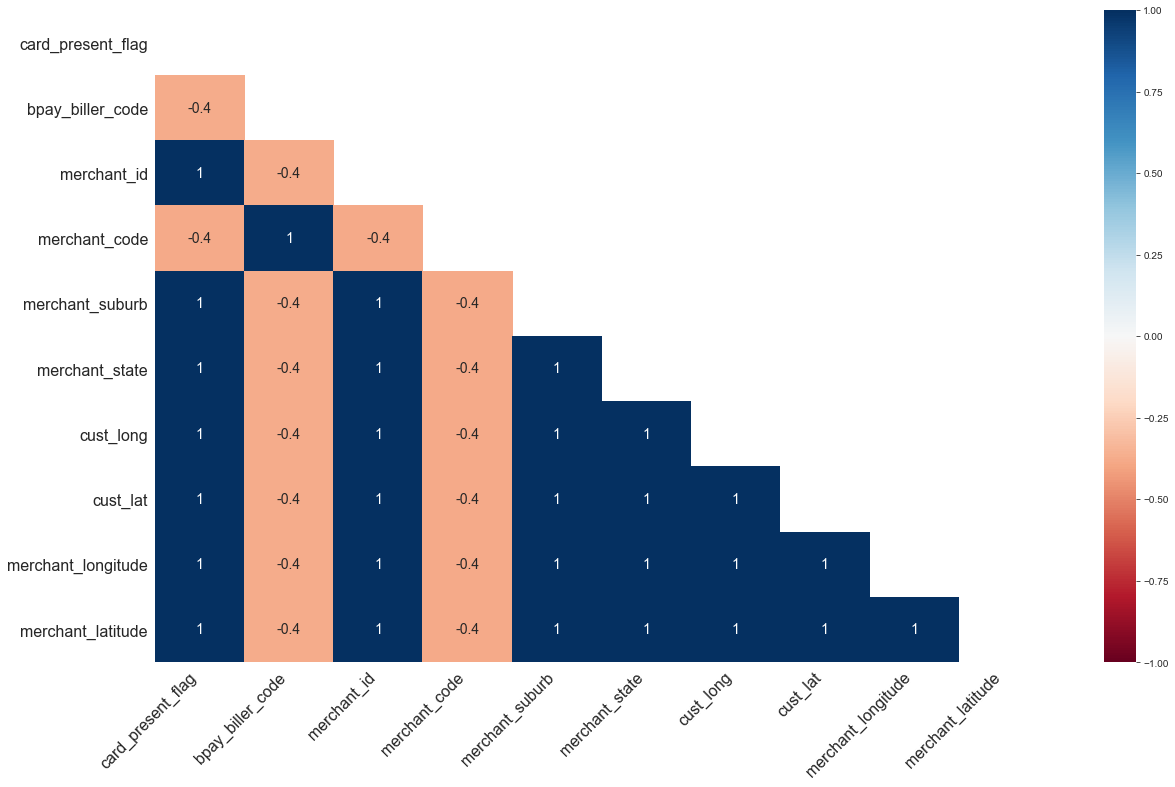

In [ ]:
msno.heatmap(transact)

In [ ]:
transact.txn_description.value_counts(normalize=True)

SALES-POS     0.326663
POS           0.314124
PAYMENT       0.215893
PAY/SALARY    0.073321
INTER BANK    0.061613
PHONE BANK    0.008387
Name: txn_description, dtype: float64

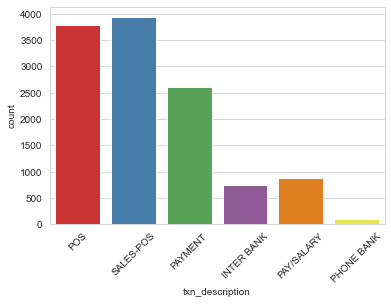

In [ ]:
g = sns.countplot(transact.txn_description,palette='Set1')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

In [ ]:
transact.movement.value_counts(normalize=True)

debit     0.926679
credit    0.073321
Name: movement, dtype: float64

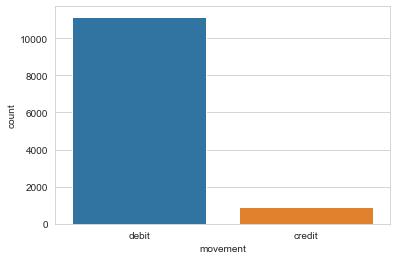

In [ ]:
sns.countplot(transact.movement)

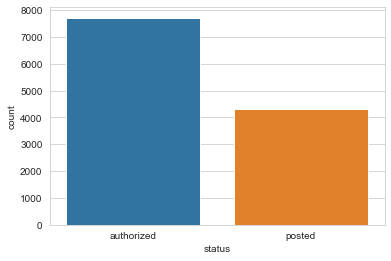

In [ ]:
sns.countplot(transact.status)

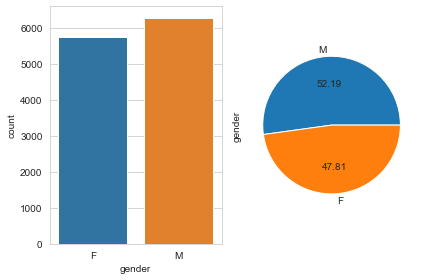

In [ ]:
f,axes=plt.subplots(1,2)
sns.countplot(transact.gender,ax=axes[0])
transact.gender.value_counts(normalize=True).plot(kind='pie', autopct='%.2f',ax=axes[1])
plt.tight_layout()

In [ ]:
transact.merchant_state.value_counts(normalize=True)

NSW    0.281068
VIC    0.276144
QLD    0.201633
WA     0.142542
SA     0.053777
NT     0.026565
ACT    0.009460
TAS    0.008812
Name: merchant_state, dtype: float64

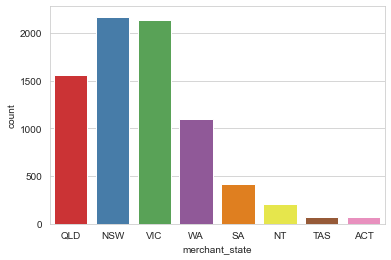

In [ ]:
sns.countplot(transact.merchant_state,palette='Set1')

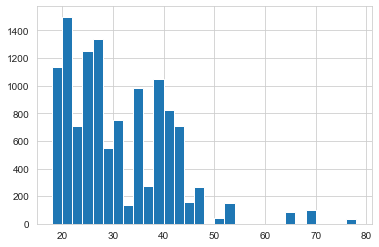

In [ ]:
transact['age'].hist(bins=30)

<Figure size 720x432 with 0 Axes>

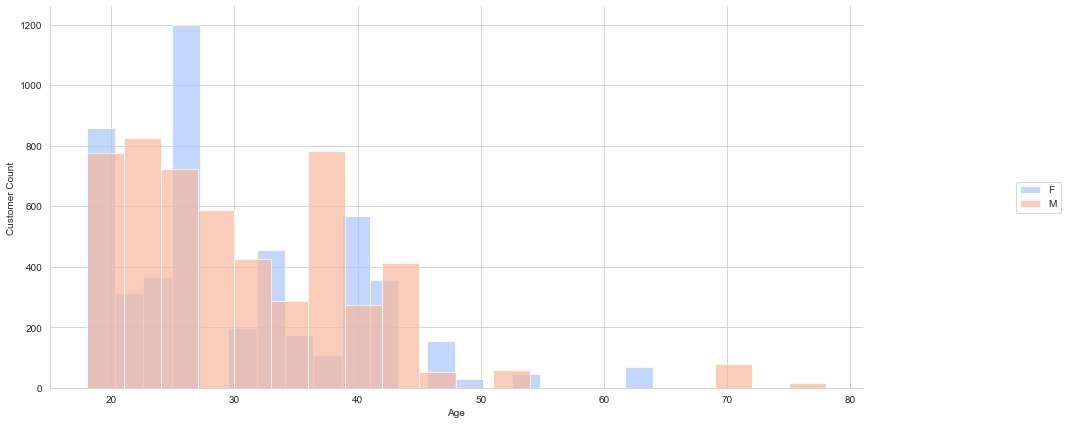

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
g = sns.FacetGrid(transact,hue="gender",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'age',bins=20,alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Customer Count')
plt.legend(loc='center right',bbox_to_anchor=(1.25,0.5))

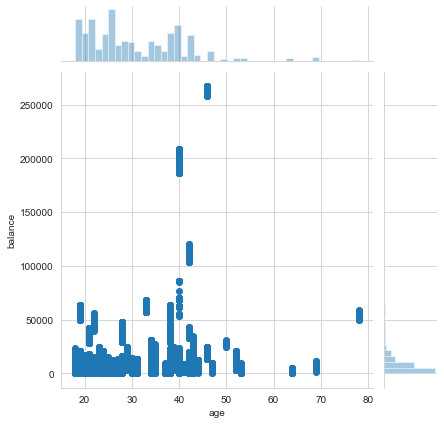

In [ ]:
sns.jointplot(x='age',y='balance',data=transact)

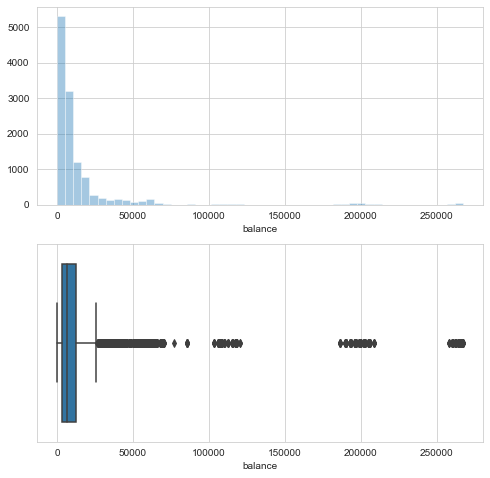

In [ ]:
f,axes=plt.subplots(2,1,figsize=(8,8))
sns.distplot(transact.balance,kde=False,ax=axes[0])
plt.xlabel('Balance')
sns.boxplot(transact.balance,ax=axes[1])
plt.show()

**The transactions include purchase and other types-payment, inter bank, pay/salary, phone bank etc,it is worthwhile to filter these out from the overall dataset and have a look.**

Assuming purchase transactions must be associated with a merchant (have a merchant_id)

In [ ]:
purchase_transactions = transact[transact['merchant_id'].notnull()]

In [ ]:
purchase_transactions.shape

(7717, 31)

In [ ]:
transact['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [ ]:
purchase_transactions.txn_description.unique()

array(['POS', 'SALES-POS'], dtype=object)

In [ ]:
set(transact.txn_description).intersection(set(purchase_transactions.txn_description))

{'POS', 'SALES-POS'}

In [ ]:
purchase_transactions['month'].value_counts()

Sept    2601
Oct     2581
Aug     2535
Name: month, dtype: int64

In [ ]:
purchase_transactions['customer_id'].value_counts()

CUS-2487424745    531
CUS-2142601169    276
CUS-3026014945    248
CUS-1614226872    220
CUS-860700529     206
                 ... 
CUS-3151318058      9
CUS-495599312       9
CUS-2500783281      4
CUS-2630892467      4
CUS-1646183815      3
Name: customer_id, Length: 100, dtype: int64

**Visualize the distribution of transaction amount**

Text(0, 0.5, 'Frequency')

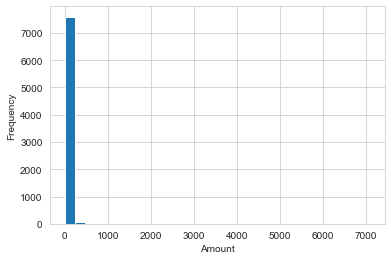

In [ ]:
purchase_transactions['amount'].hist(bins=30)
plt.xlabel('Amount')
plt.ylabel('Frequency')

Exclude the outliers in the plot

Text(0.5, 0, 'Month')

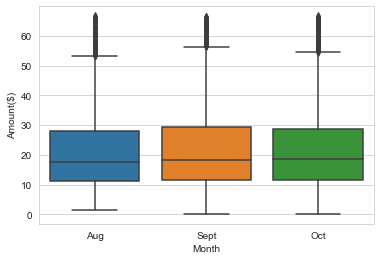

In [ ]:
sns.boxplot(x='month',y='amount',data=purchase_transactions)
plt.ylabel('Amount($)')
plt.xlabel('Month')

Text(0, 0.5, 'Frequency')

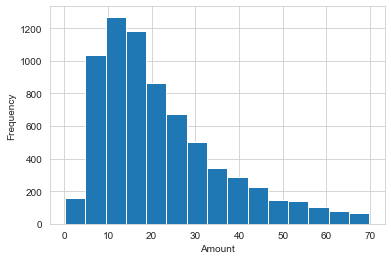

In [ ]:
purchase_transactions[purchase_transactions['amount']<70]['amount'].hist(bins=15)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of purchase transaction amount')

In [ ]:
col = ['amount']
Q1 = purchase_transactions[col].quantile(0.25)
Q3 = purchase_transactions[col].quantile(0.75)
IQR = Q3 - Q1

purchase_transactions = purchase_transactions[~((purchase_transactions[col] < (Q1 - 1.5 * IQR)) |(purchase_transactions[col] > (Q3 + 1.5 * IQR))).any(axis=1)]

Text(0.5, 1.0, 'History of Purchase Transaction Amount')

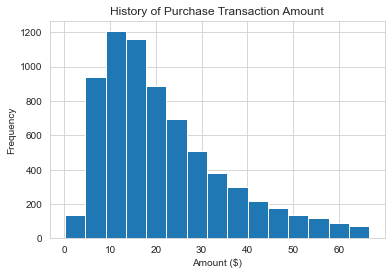

In [ ]:
purchase_transactions['amount'].hist(bins=15)
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.title('History of Purchase Transaction Amount')

Text(0.5, 1.0, 'History of Overall Transaction Amount')

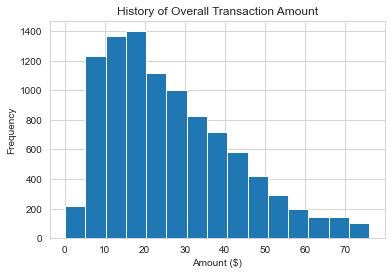

In [ ]:
col = ['amount']
Q1 = transact[col].quantile(0.25)
Q3 = transact[col].quantile(0.75)
IQR = Q3 - Q1

transact = transact[~((transact[col] < (Q1 - 1.5 * IQR)) |(transact[col] > (Q3 + 1.5 * IQR))).any(axis=1)]
transact['amount'].hist(bins=15)
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.title('History of Overall Transaction Amount')

In [ ]:
dayHour = transact.groupby(by=['weekday','hour']).count()['txn_description'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,9,17,8,28,15,13,18,10,52,164,...,57,62,23,51,23,34,85,62,49,30
1,10,23,20,30,41,30,21,48,53,177,...,73,79,48,64,57,34,52,33,26,32
2,12,34,16,3,27,2,51,48,120,211,...,107,156,76,98,45,81,89,64,47,79
3,15,29,21,27,53,28,34,42,97,171,...,88,109,48,93,63,87,43,65,75,64
4,22,34,26,30,62,22,37,34,86,123,...,109,89,87,76,73,134,82,173,65,67


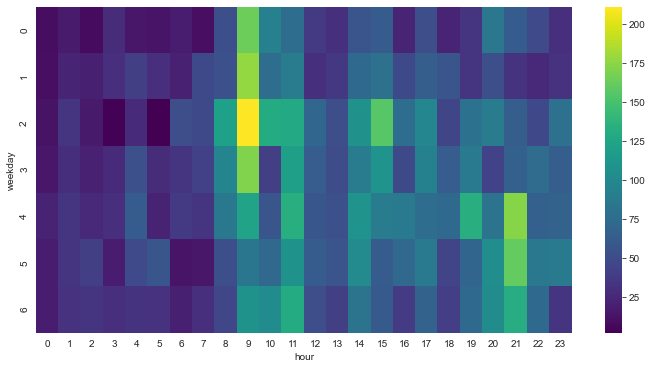

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

In [ ]:
transact.groupby('customer_id').count()['month'].sort_values(ascending=False)

customer_id
CUS-2487424745    550
CUS-2142601169    269
CUS-3026014945    263
CUS-1614226872    233
CUS-3378712515    231
                 ... 
CUS-1233833708     22
CUS-1739931018     19
CUS-1646183815     16
CUS-3201519139      9
CUS-495599312       6
Name: month, Length: 100, dtype: int64

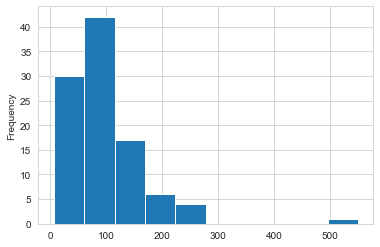

In [ ]:
transact.groupby('customer_id').count()['month'].plot(kind='hist')

**Visualize transaction volume over an average week**

Text(0, 0.5, 'Transaction Volume')

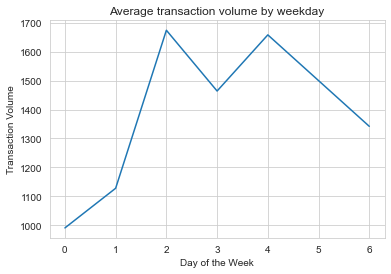

In [ ]:
transact.groupby('weekday').count()['txn_description'].plot(kind='line')
plt.title('Average transaction volume by weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Volume')

**Visualize transaction volume over an average week**

Text(0.5, 1.0, 'Average transaction volume by hour')

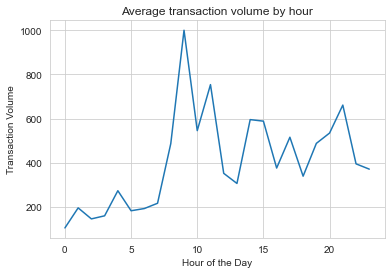

In [ ]:
transact.groupby('hour').count()['txn_description'].plot(kind='line')
plt.ylabel('Transaction Volume')
plt.xlabel('Hour of the Day')
plt.title('Average transaction volume by hour')